In [44]:
import pandas as pd
import numpy as np

In [45]:
data1 = pd.read_csv(r"labeling/마라_label.csv")
data2 = pd.read_csv(r"labeling/미역초_label.csv")
data3 = pd.read_csv(r"labeling/부대_label.csv")
data4 = pd.read_csv(r"labeling/신라면건면_label.csv")
data5 = pd.read_csv(r"labeling/앵그리너구리_label.csv")
data6 = pd.read_csv(r"labeling/와사마요_label.csv")
data7 = pd.read_csv(r"labeling/짜파구리_label.csv")
data8 = pd.read_csv(r"labeling/채황_label.csv")
data9 = pd.read_csv(r"labeling/트러플짜파게티_label.csv")
data10 = pd.read_csv(r"labeling/핵불닭_label.csv")

In [46]:
data1 = data1[['Comments','label']]
data2 = data2[['Comments','label']]
data3 = data3[['Comment','label']]
data4 = data4[['Comments','label']]
data5 = data5[['Comments','label']]
data6 = data6[['Comments','label']]
data7 = data7[['Comments','label']]
data8 = data8[['Comments','label']]
data9 = data9[['Comments','label']]
data10 = data10[['Comments','label']]

In [49]:
data3.columns=['Comments','label']

In [50]:
data = pd.concat([data1,data2, data3, data4, data5, data6, data7, data8, data9, data10], axis = 0)

In [51]:
stopwords = ['께서','에서','이다','에게','으로','이랑','까지','부터','하다',
             '구독','편집', '예쁘', '귀엽', '웃기', '해주세요','카와이', '귀엽', '졸귀', '킬포', 
             '개웃겨', '귀욤', '하이라이트', '현웃', '언니', '형', '매력', '언닌', '귀요', 
             '코로나', '재밌', '행님', '목소리','효과음', '선생님', '잘보고있어요', 
             '드셔', '드시', '재밋게',  '사기', '광고', '소리', '잘생겼', 
             '야하', '섹시', '얼굴', '기여', '기엽', '협찬', 'ppl', '배터', 
             '2019', '2020', 'asmr',  'ASMR', '너무예', '편집', '아이돌',  
             '만명', '구독자', '리액션', '슈기', '지원', '복스럽', '이쁘', 
             '존버', '께서','에서','이다','에게','으로','이랑','까지','부터','하다','구독',
             '예쁘', '귀엽', '웃기', '해주세요','카와이', '귀엽', '졸귀', '킬포', '개웃겨', 
             '귀욤', '하이라이트', '현웃', '언니', '형', '매력', '언닌', '귀요', '코로나', 
             '재밌', '행님', '소리','온니','귀여우시다','율송','사랑스럽다','귀여워요',
             '이쁘세요','눈화장','덩이','섀도우','언닝','구독','여리','동수','귀엽네','드머',
             '예뻐','에드','야하네','오빠','빵터지지','썸네일','섹시해','잘생김', '광고', 
             '단무지', '하세용', '표정', '그릇', '모습', '나름', '귀여워', '이뽀', '웃겨욬', 
             '소리', '이쁘세요', '귀여워요', '존경', '브금', '댓글', '배고파졌어용', '자세한', 
             '리뷰', '재미', '빠르다', '배고파요', '예뻐요', '컨셉', '드세요', '보겠어', 
             '다이어트', '면치기', '쌍수', '햇님', '창의력', '도끼', '텐션', '유튜브', 
             '상남자',  '자막', '귀염', '재밋', '개그맨', '질럿님', '일본', '귀여웡', '강동원', 
             '미래', '살', '째현이', '재현', '주라', '강아지', '잘생기셧어', '잘생', '세아님',
             '잘생겼어요', '오랜만에', '파투님', '숙제', '읽었나요', '카메라', '오빠', '이쁘다',
             '안전운전', '안녕하세요', '채널', '은희', '미미', '새벽', '알람', 
             '개그', '꿀잼', '엔딩', '인트로', '무리', '잠시', '틴트','벤쯔','밴쯔','밴쯔님','배다','쯔','님','동생', '화장', 
             '뽀로로', '젓가락', '젖가락', '언니', '풀메', '화장', '싸운건가', '렌즈', '숟가락', '귀욥', '싸가지', '불상해', '살', 
             '이뻐', '예뻐', '반팔티', '거슬리나', '티샤스', '예뻐', '온니', '섹시', '소리', '썸넬', '유튜버', '머리카락', 
             '주둥이', '장염','다시마','초심','정상인','하이','안녕하세요','존예','설명','고물','주승',
             '현우','지윤','귀여우','멍청', '정수기', '동무','난독증','알고', '인건', '서영', '하영', '현우', '서연', '동훈', '성준', '주승',
             '설명', '생일', '닮으', '책상', '김발', '베트맨', '님', '수고비', '나름', '소프', '가르마', '다다푸드', '초전', '개띵작',
             '고물', '도끼', '스펙타클', '불판', '누님', '삐', '도마', '나레이션', '남자', '제이슨',
             '토르', '유트버', '전기톱', '님', '미래', '콘텐츠', '컨텐츠', 
             '냉면', '돈까스', '잘드신다', '이벤트', '백현', '제이제이', '서울특별시', '괜찮', '뿜었', '왼팔',
             '빵터','웃겨요','년전','반전','긴니','먹어주세요', '말레이시아', '보세요', '겜', '편집', '화이띵',
             '진공청소기','화이팅']
             

In [52]:
data.reset_index(inplace=True, drop=True)
data.shape

(26485, 2)

In [53]:
for word in stopwords:
    data= data[~data['Comments'].str.contains(word)]
data.shape

(24768, 2)

In [54]:
data.shape

(24768, 2)

In [55]:
#Null 값 없애기
data=data.dropna()
data.isnull().sum()

Comments    0
label       0
dtype: int64

In [56]:
data.reset_index(inplace=True, drop=True)
data.shape

(24746, 2)

### 2. 워드 클라우드 

In [68]:
data.head()

,Comments,label
0,농심꺼 진짜 맛있습니다 강추 그냥 얼얼 그대로 담았어요 약간 한국인 입...,1.0
1,삼양 마라파 모여,2.0
2,편의점 가기 전에 마라탕이 먹어보고 싶어서 찾는 도중에 정말 유익한 영상이네요 감...,1.0
3,검은색 마라탕?쳄?제일 맛있음 집앞 세븐에 저거 없어서 슬픔,1.0
4,농심꺼 진짜맛있움 ㅠㅠㅠ,2.0


In [69]:
positive= data[data['label']==1]
positive

,Comments,label
0,농심꺼 진짜 맛있습니다 강추 그냥 얼얼 그대로 담았어요 약간 한국인 입...,1.0
2,편의점 가기 전에 마라탕이 먹어보고 싶어서 찾는 도중에 정말 유익한 영상이네요 감...,1.0
3,검은색 마라탕?쳄?제일 맛있음 집앞 세븐에 저거 없어서 슬픔,1.0
7,마라고수 컵라면은 전자레인지에 ?n 돌려먹여야 더 맛있어요 혹시라도 마라고수 컵...,1.0
8,진짜 유익한 정보네요 감사합니다 지금 바로 하나 사먹으러가야겠습니다,1.0
...,...,...
24740,빨먹어주서요,1.0
24741,맛있어보여요,1.0
24742,힘들게찾으셧습니다,1.0
24743,와우,1.0


In [70]:
#Null 값 없애기
positive=positive.dropna()
positive.isnull().sum()

Comments    0
label       0
dtype: int64

In [76]:
positive.reset_index(inplace=True, drop=True)
positive.tail()

,Comments,label
15979,빨먹어주서요,1.0
15980,맛있어보여요,1.0
15981,힘들게찾으셧습니다,1.0
15982,와우,1.0
15983,아구그렇게매운거오래사시겠어요,1.0


In [72]:
negative= data[data['label']==0]
negative

,Comments,label
14,마라탕면 진짜 자극적이고 못먹겠던데 먹다 버림,0.0
113,저거존나 맛없던데,0.0
146,이거 어제 먹었는데 한입먹고 버렸어요 너무 향이 강해서,0.0
153,이거 향이 너무 강해서 별로,0.0
182,저는 마라가 안맞는지 다 못먹고 남겼어요ㅋㅋ,0.0
...,...,...
24726,설마이거아직도보는사람없겠지,0.0
24732,매운음식먹방은이분이전세계갑,0.0
24736,한국인없나,0.0
24737,효쵸ㅓ춀쵸춀여ㅛㄹ욜오옿ㄹㄹㅍ오ㅠㅍㄹㅅㅍㄱ ㅅㅍ려ㅛㅍ 푶룟ㅅ 겨ㅕ ㅅㅊㅎㅍ휴,0.0


In [73]:
negative.reset_index(inplace=True, drop=True)
negative.shape

(7611, 2)

In [77]:
negative.reset_index(inplace=True, drop=True)
negative

,Comments,label
0,마라탕면 진짜 자극적이고 못먹겠던데 먹다 버림,0.0
1,저거존나 맛없던데,0.0
2,이거 어제 먹었는데 한입먹고 버렸어요 너무 향이 강해서,0.0
3,이거 향이 너무 강해서 별로,0.0
4,저는 마라가 안맞는지 다 못먹고 남겼어요ㅋㅋ,0.0
...,...,...
7606,설마이거아직도보는사람없겠지,0.0
7607,매운음식먹방은이분이전세계갑,0.0
7608,한국인없나,0.0
7609,효쵸ㅓ춀쵸춀여ㅛㄹ욜오옿ㄹㄹㅍ오ㅠㅍㄹㅅㅍㄱ ㅅㅍ려ㅛㅍ 푶룟ㅅ 겨ㅕ ㅅㅊㅎㅍ휴,0.0


In [78]:
from konlpy.tag import Okt 
mecab = Okt()

mecab_tokens = []
for i in range(len(positive)):
        #토큰화하면서 품사부착 동시에 해줄 수 있음 
        mecab_tokens.append(mecab.pos(positive["Comments"][i]))

mecab_tag_pos = []
for token in mecab_tokens: 
    mecab_tag_pos += token

In [79]:
from konlpy.tag import Okt 
mecab = Okt()

mecab_tokens = []
for i in range(len(negative)):
        #토큰화하면서 품사부착 동시에 해줄 수 있음 
        mecab_tokens.append(mecab.pos(negative["Comments"][i]))

mecab_tag_neg = []
for token in mecab_tokens: 
    mecab_tag_neg += token

### 3. 불용어 처리 

In [80]:
from collections import Counter 
Counter(mecab_tag_pos).most_common()

[(('불닭', 'Noun'), 1567),
 (('에', 'Josa'), 1557),
 (('이', 'Josa'), 1219),
 (('도', 'Josa'), 1117),
 (('라면', 'Noun'), 1025),
 (('은', 'Josa'), 992),
 (('가', 'Josa'), 920),
 (('거', 'Noun'), 908),
 (('저', 'Determiner'), 871),
 (('는', 'Josa'), 865),
 (('이', 'Determiner'), 848),
 (('맛', 'Noun'), 842),
 (('핵', 'Noun'), 825),
 (('먹어', 'Verb'), 822),
 (('진짜', 'Noun'), 803),
 (('면', 'Josa'), 748),
 (('요', 'Josa'), 663),
 (('을', 'Josa'), 662),
 (('ㅋㅋ', 'KoreanParticle'), 659),
 (('저', 'Noun'), 652),
 (('와', 'Verb'), 509),
 (('...', 'Punctuation'), 495),
 (('?', 'Punctuation'), 486),
 (('먹으면', 'Verb'), 485),
 (('ㅠㅠ', 'KoreanParticle'), 478),
 (('매운', 'Adjective'), 471),
 (('..', 'Punctuation'), 460),
 (('너무', 'Adverb'), 449),
 (('와사비', 'Noun'), 448),
 (('ㅎㅎ', 'KoreanParticle'), 437),
 (('.', 'Punctuation'), 420),
 (('때', 'Noun'), 403),
 (('ㅋ', 'KoreanParticle'), 402),
 (('물', 'Noun'), 400),
 (('불닭볶음면', 'Noun'), 398),
 (('ㅋㅋㅋㅋ', 'KoreanParticle'), 396),
 (('아', 'Exclamation'), 383),
 (('나', 'Noun'), 

In [81]:
Counter(mecab_tag_neg).most_common()

[(('이', 'Josa'), 1051),
 (('에', 'Josa'), 1023),
 (('는', 'Josa'), 887),
 (('가', 'Josa'), 802),
 (('은', 'Josa'), 763),
 (('맛', 'Noun'), 632),
 (('을', 'Josa'), 579),
 (('라면', 'Noun'), 541),
 (('이', 'Determiner'), 522),
 (('?', 'Punctuation'), 497),
 (('거', 'Noun'), 495),
 (('도', 'Josa'), 440),
 (('불닭', 'Noun'), 438),
 (('안', 'VerbPrefix'), 422),
 (('저', 'Determiner'), 420),
 (('ㅋㅋㅋ', 'KoreanParticle'), 411),
 (('왜', 'Noun'), 401),
 (('저', 'Noun'), 391),
 (('다', 'Adverb'), 390),
 (('..', 'Punctuation'), 375),
 (('ㅋㅋ', 'KoreanParticle'), 363),
 (('.', 'Punctuation'), 357),
 (('물', 'Noun'), 353),
 (('진짜', 'Noun'), 348),
 (('...', 'Punctuation'), 330),
 (('와사비', 'Noun'), 320),
 (('만', 'Josa'), 302),
 (('면', 'Josa'), 300),
 (('그냥', 'Noun'), 293),
 (('난', 'Noun'), 291),
 (('먹어', 'Verb'), 285),
 (('사람', 'Noun'), 285),
 (('개', 'Noun'), 272),
 (('핵', 'Noun'), 260),
 (('들', 'Suffix'), 246),
 (('\n', 'Foreign'), 238),
 (('너무', 'Adverb'), 235),
 (('더', 'Noun'), 235),
 (('한', 'Determiner'), 233),
 (('

In [179]:
stopPos = ['Josa','Determiner','Punctuation','KoreanParticle','Adverb','Suffix','Exclamation']
stopWord = ['거','진짜','먹어','저','먹으면','와','때','더','나','사람',
           '먹고','왜','개','영상','먹는','그냥','먹을','오늘','건','요','면','먹는데','입',
           '분','봤는데','전','것','먹어요','마','내','입니다','\n','오', '제', '나도',
            '매', '넣고', '먹음', '걸', '먹었는데', '도', '맛있는데', '배', '1', '갑니다',
            '지금', '뎅', '이', '번', '좀', '같아요', '먹고싶다', '합니다', '너', 
            '움', '그리', '여', '치마', '그거', '해서', '넣어', '또', '말', '보기', 
            '있는', '어떻게', '코', '꼭', '보여요','난', '좀', '잘', '제', '뭐', '역시', '버리고', '임', '먹었는데', 
            '먹기', '보기', '같아요', 'drunk', '계속', '아저씨', '계속', '수박', '넣어서', '정도', 
            '넣고', '그리', '입술','맛','안','물', 'the', '다음', 'I', '아니라', '그', '맛있게', '맛있어', 
            '맛있어요', '보고', '못', '불닭', '매워', '매워', '매운데', '마지막', '있어요', 
            '제일', '그리고', '가요', '하나', '먹어서', '했는데', '있는데', '만해', '먹는다', 
            '이건', '무슨', '아닌가', '같은데', '거의', '없음', '결론', '물안', '원래', '라면', 
            '불닭', '도안', '농심', '오뚜기', '조금', '아니', '솔직히', '때문', 
            '매운거', '매워요', '별', 's', '눈', '맵', '을', '맵', '함', '향', '않', '듯', '건가', '음',
           '은','2','you','본','닭','일','돈','바','먹지']

positive_word = []
for tag in mecab_tag_pos:
    if tag[1] not in stopPos:
        if tag[0] not in stopWord:
            positive_word.append(tag[0])
print(positive_word)

['맛있습니다', '강추', '얼얼', '그대로', '담았어요', '약간', '한국인', '입맛', '는', '갓', '같아여', '편의점', '가기', '마라', '탕', '싶어서', '찾는', '도중', '정말', '유익한', '영', '상이', '감사합니다', '검은색', '마라', '탕', '쳄', '맛있음', '집앞', '세븐', '없어서', '슬픔', '마라고수', '컵라면', '전자레인지', 'n', '돌려', '먹여야', '혹시', '마라고수', '컵라면', '드실', '전자렌지', '돌려', '먹는거', '추천', '드립니다', '유익한', '정보', '감사합니다', '바로', '사먹으러', '가야겠습니다', '보지', '말았어야', '마라', '탕', '끊은지', '두', '달', '짼대', '땡긴다', '완전', '마라', '탕', '중독', '잔데', '낼', '당장', '사러가야겠어오', '정말', '같지', '않고', '샤브샤브', '국물', '고급', '보이네요', '꿀맛', '겠다', '올리러', '봐야겠어요', '청경채', '쑥갓', '넘', '조아하는데', '마라', '탕', '봉지', '컵라면', '사서', '전자레인지', '초', '조리', '정말', '마라', '탕', '나오는', '같아여', '재료', '추가', '해', '맛있겠어용', '구', '뜨', '아이디어', '삼양', '잇겠네요', '삼양라면', '좋아해서', '마라', '탕', '보고싶어요', '마라', '탕', '먹고싶어서', '숙주나물', '만들어', '국물', '마라', '탕', '가까워서', '신기했어요', '야채', '제대로', '만들면', '마라', '탕', '같을거', '같아용', '보고있어요', '끓여', '싶네요', '마라', '탕', '즉석', '떡볶이', '같은', '느낌이네요', '맛있겠다', '츄릅', '최애영', '될', '마라', '탕', '좋아하는데', '보는내내', '한', '떼고', '집중', '봤어', 'D', '최고', '

In [180]:
negative_word = []
for tag in mecab_tag_neg:
    if tag[1] not in stopPos:
        if tag[0] not in stopWord:
            negative_word.append(tag[0])
print(negative_word)

['마라', '탕', '자극', '먹겠던데', '먹다', '버림', '존나', '맛없던데', '어제', '버렸어요', '강해서', '강해서', '별로', '마라가', '맞는지', '남겼어요', '쓰레기', '내다', '버림', '노맛', '사먹으려고', '했는대', '사먹었으면', '큰일', '날뻔', '매장', '마라', '탕', '어', '든', '나은듯', '용은', '실패했다', '마라', '탕', '먹고있는데', '정확히', '알려', '준다', '고', '수', '나프탈렌', '먹는거', '같은', '맛임', '마트', '가면', '동남아', '향신료', '들어있는데', '맛임', '도저히', '먹겟어서', '버렷다', '루', '엿', '은은하지', '않음', '마라', '탕', '볶음', '해도', '존나', '맛없음', '겁나', '짜서', '증발', '해', '버릴거', '같음', '개맛', '대가리', '없던데', '맛있나요', '마라', '탕', '이런', '하는', '느낌', '국물', '개짬', '불호', '혓바닥', '얼얼한건', '모르겠고', '주변', '약간', '따가운', '느낌', '옥수수', '온면', '따라한', '화학', '섬유', '마라', '탕', '같음', '저희', '별로', '던데', '마라', '좋아하는데', '마라', '훠궈', '홍탕', '같은', '별로', '더라구요', '차라리', '씨유', '파는', '좀더', '비싼', '마라', '탕', '그게', '마라', '탕', '같아서', '입맛', '맞던데', '산초', '기름', '불호', '더라고요', '약간', '샴푸', '바디', '워시', '느낌', '마라', '볶음', '불호', '마라', '좋아해서', '넘', '약했음', '따라한', '느낌', '마라', '볶음', '먹겠어용', '향신료', '선호', '하지', '않고', '맛없어서', '남겼어용', '마라', '탕', '표현', '하자면', '마라', '요리', '한번', '비추', '만든

In [181]:
from collections import Counter 
KW = Counter(positive_word).most_common()
pos = pd.DataFrame(KW, columns = ['단어', '언급횟수'])
pos = pos.nlargest(45, '언급횟수')
pos.tail(30)

,단어,언급횟수
15,김치,163
16,국물,162
17,짜파게티,158
18,신라면,155
19,한국인,153
20,참,146
21,해,138
22,먹방,138
23,짜파구리,134
24,탕,133


In [182]:
KW = Counter(negative_word).most_common()
neg = pd.DataFrame(KW, columns = ['단어', '언급횟수'])
neg = neg.nlargest(45, '언급횟수')
neg.tail(30)

,단어,언급횟수
15,사마요,76
16,생각,70
17,줄,70
18,컵라면,69
19,짜,69
20,우리,69
21,봉지,66
22,스프,65
23,혀,64
24,할,64


In [183]:
pos.to_csv('긍정.csv')

In [184]:
neg.to_csv('부정.csv')

### 4. top 50위 단어들을 가지고 워드클라우드 만들기

In [185]:
pos_dataset = open("긍정.csv", "r",encoding='UTF-8').read()

In [194]:
pos_dataset = ',\n0,핵,825\n1,매운,471\n2,와사비,448\n3,불닭볶음면,398\n4,맛있겠다,291\n5,한번,278\n6,너구리,254\n7,치즈,250\n8,마라,239\n9,와사마요,198\n10,좋아요,191\n11,우유,186\n12,정말,185\n13,음식,184\n14,소스,182\n15,김치,163\n16,국물,162\n17,짜파게티,158\n18,신라면,155\n19,한국인,153\n20,참,146\n21,해,138\n22,먹방,138\n23,짜파구리,134\n24,탕,133\n25,처음,133\n26,밥,131\n27,봉지,123\n28,매워서,121\n29,넘,120\n30,편의점,119\n31,생각,119\n32,사랑,119\n33,완전,117\n34,한국,115\n35,친구,111\n36,먹,111\n37,스프,111\n38,좋아하는데,108\n39,맛있음,101\n40,최고,100\n41,계란,99\n42,볶음,94\n43,존맛,94\n44,반,91\n'

In [188]:
neg_dataset = open("부정.csv", "r",encoding='UTF-8').read()

In [195]:
neg_dataset = '\n0,와사비,320\n1,핵,260\n2,소스,186\n3,너구리,186\n4,매운,127\n5,마라,126\n6,느낌,119\n7,짜파게티,118\n8,신라면,110\n9,별로,109\n10,우유,108\n11,불닭볶음면,106\n12,국물,93\n13,먹방,88\n14,팔도,76\n15,와사마요,76\n16,생각,70\n17,줄,70\n18,컵라면,69\n19,짜,69\n20,우리,69\n21,봉지,66\n22,스프,65\n23,혀,64\n24,할,64\n25,양,63\n26,데,60\n27,볶음,59\n28,반,57\n29,부대찌개,55\n30,탕,54\n31,뭔가,54\n32,음식,54\n33,냄새,52\n34,친구,52\n35,요즘,51\n36,한국인,51\n37,같은,47\n38,처음,46\n39,비빔면,45\n40,물이,45\n41,피똥,44\n42,한,44\n43,짜파구리,42\n44,먹,42\n'

In [90]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\anaconda3\envs\py37

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         184 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    freetype-2.10.2            |       hd328e21_0         490 KB  conda-forge
    jpeg-9d                    |       he774522_0         344 KB  conda-forge
    kiwisolver-1.2.0           |   py37heaa310e_0          61 KB  conda-forge
    libblas-3.8.0              |           16_mkl         3.6 MB  conda-forge
    libcblas-3.8.0             |           16_mkl         3.6 MB  conda-forge
    liblapack-3.8.0            |           16_mkl         3.6 MB  conda-forge
  

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(139): Could not remove or rename C:\anaconda3\envs\py37\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


In [191]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

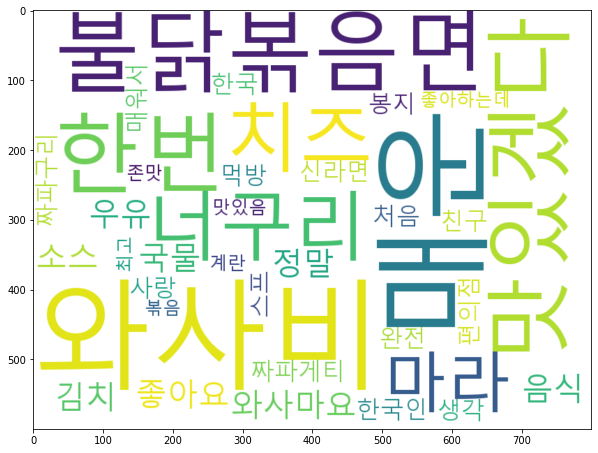

In [196]:
#한글은 깨지기 때문에 C드라이브 > fonts 검색 > 맑은 고딕 등 > 바탕화면에 불어넣기 > 아래 path 입력하기 
path = 'malgun.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=path)

def create_word_cloud(string):
    maskArray = npy.array(Image.open("circle.png"))
    cloud = WordCloud(font_path =path, background_color = "white", width=800, height=600)
    cloud.generate(string)
    cloud.to_file("circle.png")
    pPlot.figure(figsize=(10,8))
    pPlot.imshow(cloud, interpolation = 'bilinear')
    return pPlot.show()

pos_dataset = pos_dataset.lower()
create_word_cloud(pos_dataset)

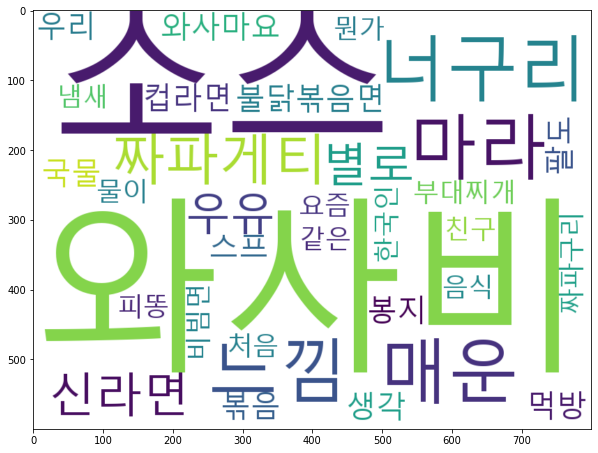

In [197]:
neg_dataset = neg_dataset.lower()
create_word_cloud(neg_dataset)